# Train ADAGE models on RNAseq data

### Georgia Doing 2021

This notebook walks through the training of an RNAseq-based ADAGE model as a continuation of analyses from last year (2021_06_eADAGE_adapt/seqADAGE).

Since then we have downloaded a new compendium of RNAseq data and aligned it to the PAO1 and PA14 reference genomes using prokarytoic-optimized parameters.
(https://github.com/hoganlab-dartmouth/pa-seq-compendia)

The main objectives are to train models, take a first look and save the models for further analysis on forthcoming notebooks
1. Load compendia
2. Train and save models
3. Visualize first-look plots

### 0. Setup

In [1]:
import run_count_autoencoder
import run_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imp import reload
import Adage

In [13]:
# for dev purposes, while updating run_model.py need to reload
sns.reset_orig()
reload(run_count_autoencoder)
reload(run_model)
reload(Adage)

<module 'Adage' from '/Users/georgia/Dropbox (Hogan Lab)/Digital_notebook/2021_04_23_seqADAGE/seqADAGE/Py/Adage.py'>

### 1. Load Compendia

In [2]:
array_comp = np.loadtxt(open('../data_files/train_set_normalized_no_names.csv', "rb"),delimiter=',',skiprows = 1)
a_gene_num = np.size(array_comp, 0)
a_samp_num = np.size(array_comp, 1)
print(a_gene_num, a_samp_num)

5549 950


In [3]:
seq_comp = np.loadtxt(open('../data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log_01_no_gene_names.csv', "rb"),delimiter=',',skiprows = 1)
s_gene_num = np.size(seq_comp, 0)
s_samp_num = np.size(seq_comp, 1)
print(s_gene_num, s_samp_num)

5563 2766


<AxesSubplot:ylabel='Density'>

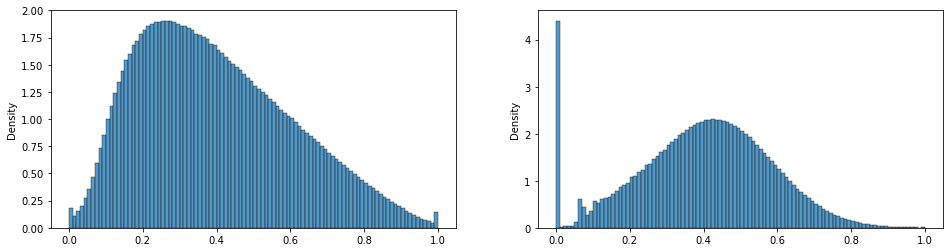

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16 ,4))
sns.histplot(array_comp.flatten(), stat='density', binwidth=.01,ax=ax1)
sns.histplot(seq_comp.flatten(), stat='density', binwidth=.01,ax=ax2)

### 2. Train Models

In [54]:
ma = run_model.run_model('../data_files/train_set_normalized.csv',lr=.01,seed=560,kl1=0,kl2=0,act = 'sigmoid', tied = True, epochs=200, init='glorot_uniform', batch_size=10)
m = run_model.run_model('../data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log_01.csv',lr=.01,seed=460,kl1=1e-10,kl2=1e-1,act = 'sigmoid', tied = True, epochs=200, init='glorot_uniform', batch_size=10)
mc = run_count_autoencoder.run_count_autoencoder('../data_files/pao1_aligned_rnaseq_compendium_zp2_MRnorm_log_01.csv',lr=.01,seed=460,kl1=1e-10,kl2=1e-1, act = 'relu', tied = True, epochs=200, init='glorot_uniform', batch_size=10)

tf_adage = Adage.Adage(ma.autoencoder, ma.history, ma.compendium)
tf_weights = np.array(pd.read_csv('../outputs/ADAGE_OG_weights.csv', header = None))
tf_cost = pd.read_csv('../outputs/ADAGE_OG_cost_log.csv')
tf_adage.weights = tf_weights
tf_adage.loss = tf_cost['cost']
tf_adage.set_hwg_cutoff(2.5).shape

test
tensorflow
(5549, 950)
float32
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               1665000   
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 5549)              1665000   
Total params: 1,665,000
Trainable params: 1,665,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
86/86 [==============================] - 2s 16ms/step - loss: 0.6962 - val_loss: 0.6960
Epoch 2/200
86/86 [==============================] - 1s 15ms/step - loss: 0.6957 - val_loss: 0.6955
Epoch 3/200
86/86 [==============================] - 1s 15ms/step - loss: 0.6953 - val_loss: 0.6951
Epoch 4/200
86/86 [==============================] - 1s 15ms/step - loss: 0.6949 - val_loss: 0.6947
Epoch 5/200
86/86 [==============================] - 1s 15ms/step - lo

86/86 [==============================] - 1s 14ms/step - loss: 0.6785 - val_loss: 0.6798
Epoch 76/200
86/86 [==============================] - 1s 13ms/step - loss: 0.6783 - val_loss: 0.6796
Epoch 77/200
86/86 [==============================] - 1s 14ms/step - loss: 0.6781 - val_loss: 0.6794
Epoch 78/200
86/86 [==============================] - 1s 15ms/step - loss: 0.6779 - val_loss: 0.6792
Epoch 79/200
86/86 [==============================] - 2s 18ms/step - loss: 0.6777 - val_loss: 0.6791
Epoch 80/200
86/86 [==============================] - 2s 18ms/step - loss: 0.6775 - val_loss: 0.6789
Epoch 81/200
86/86 [==============================] - 1s 15ms/step - loss: 0.6773 - val_loss: 0.6787
Epoch 82/200
86/86 [==============================] - 1s 14ms/step - loss: 0.6771 - val_loss: 0.6785
Epoch 83/200
86/86 [==============================] - 1s 15ms/step - loss: 0.6769 - val_loss: 0.6783
Epoch 84/200
86/86 [==============================] - 1s 15ms/step - loss: 0.6766 - val_loss: 0.6782
Epo

86/86 [==============================] - 1s 14ms/step - loss: 0.6621 - val_loss: 0.6656
Epoch 156/200
86/86 [==============================] - 1s 15ms/step - loss: 0.6620 - val_loss: 0.6654
Epoch 157/200
86/86 [==============================] - 1s 15ms/step - loss: 0.6618 - val_loss: 0.6653
Epoch 158/200
86/86 [==============================] - 1s 14ms/step - loss: 0.6616 - val_loss: 0.6651
Epoch 159/200
86/86 [==============================] - 1s 15ms/step - loss: 0.6614 - val_loss: 0.6650
Epoch 160/200
86/86 [==============================] - 1s 14ms/step - loss: 0.6613 - val_loss: 0.6648
Epoch 161/200
86/86 [==============================] - 1s 14ms/step - loss: 0.6611 - val_loss: 0.6647
Epoch 162/200
86/86 [==============================] - 1s 14ms/step - loss: 0.6609 - val_loss: 0.6645
Epoch 163/200
86/86 [==============================] - 1s 14ms/step - loss: 0.6607 - val_loss: 0.6644
Epoch 164/200
86/86 [==============================] - 1s 14ms/step - loss: 0.6606 - val_loss: 0

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


test
tensorflow
(5563, 2766)
float32
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 300)               1669200   
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 5563)              1669200   
Total params: 1,669,200
Trainable params: 1,669,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
249/249 [==============================] - 7s 28ms/step - loss: 36.7746 - val_loss: 21.6817
Epoch 2/200
249/249 [==============================] - 7s 27ms/step - loss: 14.0053 - val_loss: 8.4366
Epoch 3/200
249/249 [==============================] - 6s 26ms/step - loss: 5.6043 - val_loss: 3.5497
Epoch 4/200
249/249 [==============================] - 6s 25ms/step - loss: 2.5047 - val_loss: 1.7466
Epoch 5/200
249/249 [==============================] - 6s 

249/249 [==============================] - 7s 27ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 75/200
249/249 [==============================] - 7s 28ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 76/200
249/249 [==============================] - 7s 28ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 77/200
249/249 [==============================] - 7s 29ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 78/200
249/249 [==============================] - 9s 34ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 79/200
249/249 [==============================] - 8s 32ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 80/200
249/249 [==============================] - 7s 29ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 81/200
249/249 [==============================] - 13s 52ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 82/200
249/249 [==============================] - 6s 25ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 83/200
249/249 [==============================] - 8s 30ms/step - loss: 0.6923 -

249/249 [==============================] - 7s 29ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 154/200
249/249 [==============================] - 7s 27ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 155/200
249/249 [==============================] - 7s 26ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 156/200
249/249 [==============================] - 7s 27ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 157/200
249/249 [==============================] - 7s 26ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 158/200
249/249 [==============================] - 7s 28ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 159/200
249/249 [==============================] - 7s 28ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 160/200
249/249 [==============================] - 6s 26ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 161/200
249/249 [==============================] - 6s 26ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 162/200
249/249 [==============================] - 6s 24ms/step - loss: 

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
249/249 [==============================] - 12s 44ms/step - loss: 17.6989 - val_loss: 12.8033
Epoch 2/200
249/249 [==============================] - 10s 39ms/step - loss: 8.0504 - val_loss: 3.9516
Epoch 3/200
249/249 [==============================] - 10s 40ms/step - loss: 9.2012 - val_loss: 7.0067
Epoch 4/200
249/249 [==============================] - 11s 45ms/step - loss: 8.6855 - val_loss: 6.3924
Epoch 5/200
249/249 [==============================] - 11s 44ms/step - loss: 8.5012 - val_loss: 8.2846
Epoch 6/200
249/249 [==============================] - 12s 46ms/step - loss: 8.7260 - val_loss: 146.8201
Epoch 7/200
249/249 [==============================] - 11s 44ms/step - loss: 10.4889 - val_loss: 10.2603
Epoch 8/200
249/249 [==============================] - 11s 44ms/step - loss: 9.7615 - val_loss: 4.0039
Epoch 9/200
249/249 [==============================] - 13s 53ms/step - loss: 8.5276 - val_loss: 5.3957
Epoch 10/200
249/249 [==============================] - 14s 58ms/st


Epoch 00075: ReduceLROnPlateau reducing learning rate to 9.999998695775504e-09.
Epoch 76/200
249/249 [==============================] - 19s 77ms/step - loss: 1.9153 - val_loss: 2.3451
Epoch 77/200
249/249 [==============================] - 20s 81ms/step - loss: 1.9210 - val_loss: 2.3451
Epoch 78/200
249/249 [==============================] - 21s 84ms/step - loss: 1.9187 - val_loss: 2.3451
Epoch 79/200
249/249 [==============================] - 19s 76ms/step - loss: 1.9251 - val_loss: 2.3451
Epoch 80/200
249/249 [==============================] - 19s 76ms/step - loss: 1.9193 - val_loss: 2.3451
Epoch 81/200
249/249 [==============================] - 19s 78ms/step - loss: 1.9113 - val_loss: 2.3451
Epoch 82/200
249/249 [==============================] - 19s 77ms/step - loss: 1.9183 - val_loss: 2.3451
Epoch 83/200
249/249 [==============================] - 26s 104ms/step - loss: 1.9183 - val_loss: 2.3451
Epoch 84/200
249/249 [==============================] - 25s 100ms/step - loss: 1.9177 

249/249 [==============================] - 11s 46ms/step - loss: 1.9186 - val_loss: 2.3451
Epoch 149/200
249/249 [==============================] - 10s 39ms/step - loss: 1.9202 - val_loss: 2.3451
Epoch 150/200
249/249 [==============================] - 10s 41ms/step - loss: 1.9246 - val_loss: 2.3451
Epoch 151/200
249/249 [==============================] - 9s 37ms/step - loss: 1.9147 - val_loss: 2.3451
Epoch 152/200
249/249 [==============================] - 9s 36ms/step - loss: 1.9230 - val_loss: 2.3451
Epoch 153/200
249/249 [==============================] - 10s 41ms/step - loss: 1.9196 - val_loss: 2.3451
Epoch 154/200
249/249 [==============================] - 9s 38ms/step - loss: 1.9221 - val_loss: 2.3451
Epoch 155/200
249/249 [==============================] - 10s 42ms/step - loss: 1.9256 - val_loss: 2.3451

Epoch 00155: ReduceLROnPlateau reducing learning rate to 9.999998977483754e-17.
Epoch 156/200
249/249 [==============================] - 11s 44ms/step - loss: 1.9261 - val_loss

(5549, 600)

### 3. First-look plots

#### Training Loss Curves

[Text(0.5, 1.0, 'RNAseq DCA (keras code)')]

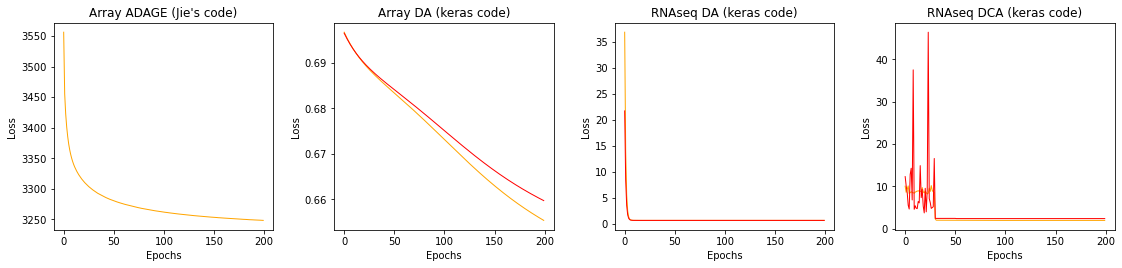

In [53]:
model_dict = {
    "t_adage": tf_adage,
    "k_adage": ma,
    "k_da" : m,
    "k_dca": mc
}
fig, ax = plt.subplots(1, 4,figsize=(16 ,4))
fig.tight_layout(pad=3.0)

name = 't_adage'
model_temp = model_dict[name]
ax[0].plot(list(range(0,200)), model_temp.loss[0:200], linewidth=1, markersize=2, color = 'orange')
ax[0].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
ax[0].set(title = "Array ADAGE (Jie's code)")

name = 'k_adage'
model_temp = model_dict[name]
ax[1].plot(list(range(0,200)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax[1].plot(list(range(0,200)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
ax[1].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
ax[1].set(title = "Array DA (keras code)")

name = 'k_da'
model_temp = model_dict[name]
ax[2].plot(list(range(0,200)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax[2].plot(list(range(0,200)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
ax[2].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
ax[2].set(title = "RNAseq DA (keras code)")

name = 'k_dca'
model_temp = model_dict[name]
ax[3].plot(list(range(0,200)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax[3].plot(list(range(0,200)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
ax[3].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
ax[3].set(title = "RNAseq DCA (keras code)")

#### Node Weight Distributions

[Text(0.5, 1.0, 'RNAseq DCA (keras code)')]

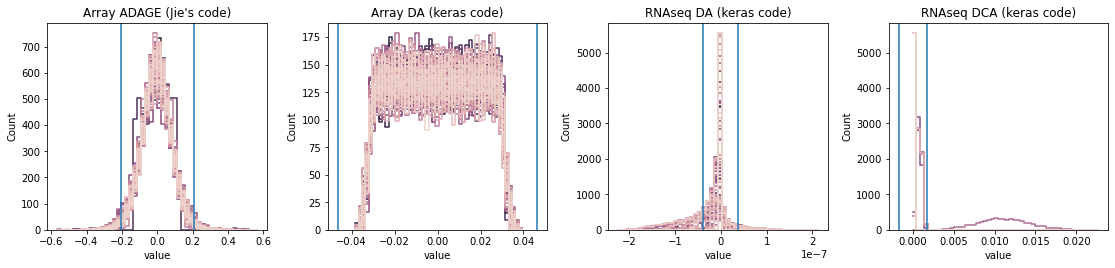

In [47]:
model_dict = {
    "t_adage": tf_adage,
    "k_adage": ma,
    "k_da" : m,
    "k_dca": mc
}

fig, ax = plt.subplots(1, 4,figsize=(16 ,4))
fig.tight_layout(pad=3.0)

name = 't_adage'
model_temp = model_dict[name]
sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,0:300])),
             x='value', hue='variable', legend=False,element='step',fill=False,
             ax=ax[0], bins=50)
ax[0].axvline(x = np.std(model_temp.weights)*2.5)
ax[0].axvline(x = np.std(model_temp.weights)*-2.5)
ax[0].set(title = "Array ADAGE (Jie's code)")

name = 'k_adage'
model_temp = model_dict[name]
sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,0:300])),
             x='value', hue='variable', legend=False,element='step',fill=False,
             ax=ax[1], bins=50)
ax[1].axvline(x = np.std(model_temp.weights)*2.5)
ax[1].axvline(x = np.std(model_temp.weights)*-2.5)
ax[1].set(title = "Array DA (keras code)")



name = 'k_da'
model_temp = model_dict[name]
sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,0:300])),
             x='value', hue='variable', legend=False,element='step',fill=False,
             ax=ax[2], bins=50)
ax[2].axvline(x = np.std(model_temp.weights)*2.5)
ax[2].axvline(x = np.std(model_temp.weights)*-2.5)
ax[2].set(title = "RNAseq DA (keras code)")



name = 'k_dca'
model_temp = model_dict[name]
sns.histplot(pd.melt(pd.DataFrame(model_temp.weights[:,0:300])),
             x='value', hue='variable', legend=False,element='step',fill=False,
             ax=ax[3], bins=50)
ax[3].axvline(x = np.std(model_temp.weights)*2.5)
ax[3].axvline(x = np.std(model_temp.weights)*-2.5)
ax[3].set(title = "RNAseq DCA (keras code)")




### Wrap-up thoughts

These models do not appear to be training, even that trained on array data. This is frustrating since last year this same code trained models on both the array and refine.bio rnaseq compendia OK. Since then the only changes have been those involved in the update of python and keras/tensorflow. 


These models seem to be training faster than the ones last year and I wonder if that is an indication of a change in the datatypes, loss function or optimizer. 